# DMI Ocean Observations

First time: [Get API key](https://confluence.govcloud.dk/pages/viewpage.action?pageId=26476690)

1. Create dmi = DMIOceanObsRepository(api_key=api_key)
2. Find station id from dmi.stations
3. Download data with dmi.get_observed_data()

In [1]:
import os
api_key = os.environ["DMI_API_KEY"]
# api_key = "e11..." # Replace with correct API key

## Data from DMI api

In [2]:
from watobs.dmi import DMIOceanObsRepository

dmi = DMIOceanObsRepository(api_key=api_key)

In [3]:
dmi.stations[dmi.stations.name.str.startswith('Kø')]

,station_id,lon,lat,name,start,end
24,30338,12.5992,55.6894,Københavns Havn,1984-12-31,1991-05-02
25,30337,12.5992,55.6894,Københavns Havn,1999-09-06,NaT
43,30478,12.1965,55.4555,Køge Havn I,2011-12-21,NaT
44,30336,12.5989,55.7043,Københavns Havn,2011-01-19,NaT
54,30479,12.1965,55.4555,Køge Havn II,2011-12-21,NaT
57,30339,12.5993,55.6896,Københavns Havn,1985-01-01,NaT
67,30337,12.5992,55.6894,Københavns Havn,1989-08-24,1999-09-06
93,30338,12.5992,55.6894,Københavns Havn,1991-05-02,NaT
99,30339,12.5993,55.6896,Københavns Havn,1974-07-18,1985-01-01
124,30336,12.5990,55.7044,Københavns Havn,2001-04-06,2011-01-19


In [4]:
import folium

map_osm = folium.Map(location=[56.0, 11.0], zoom_start=7)
dmi.stations.apply(lambda row:folium.Marker(location=[row["lat"], 
                                                  row["lon"]], popup=row["name"]).add_to(map_osm),
     axis=1)
map_osm

In [5]:
station_id = "30336" # Kbh havn

df = dmi.get_observed_data(station_id=station_id, start_time="2018-1-1", end_time="2018-1-7", limit=10000)

In [6]:
df = df.rename(columns={'sealev_dvr': 'copenhagen_harbour'})
df.head()

,copenhagen_harbour
time,
2018-01-01 00:20:00,0.18
2018-01-01 00:40:00,0.17
2018-01-01 01:10:00,0.16
2018-01-01 01:30:00,0.16
2018-01-01 02:20:00,0.18


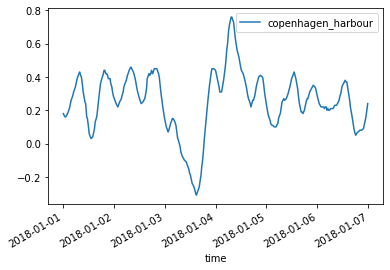

In [7]:
df.plot();